# <center> COMP 562 : Inroduction to Machine Learning </center>
## <center> <font color='red'>Lecture 4 : Linear Regression, Regularization, Ridge Regression </font> </center> 
### <center> Mahmoud Mostapha </center> 
### <center> Department of Computer Science -- UNC Chapel Hill</center>
###  <center> September 5, 2018 </center>

# COMP 562 – Lecture 4

Plan for today

1. Review linear regression and gradient ascent
2. Derive closed form solutions for linear regression parameters
4. Illustrate problems with having more paramaters than samples
5. Introduce concept of regularization 
6. Ridge regression

$$
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\loglik}{\log\mathcal{L}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{|}
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
$$

# Last Time -- Linear Regression

$$
\begin{aligned}
y \given \xx &= \beta_0 + \sum_j x_j \beta_j + \epsilon\\
\epsilon &\sim \Gaussian{0}{\sigma^2}
\end{aligned}
$$

1. Prediction from the model:
$$
\hat{y} = \beta_0 + \sum_j x_j \beta_j
$$
2. Residual
$$
e = y - \hat{y} = y- (\beta_0 + \sum_j x_j \beta_j)
$$
3. Log-likelihood
$$
\loglik(\beta_0,\beta,\sigma^2|\yy,\xx) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2\right]
$$


# Linear Regression -- Terminology

$$
y \given \xx \sim \Gaussian{\beta_0 + \sum_{j=1}^p x_j \beta_j}{ \sigma^2}
$$

* $y$ is a target variable we are modeling 
* $\xx$ is a vector of $p$ features (aka predictors and covariates)
* $\beta_0$ is a intercept (bias) which does not depent on the features
* $\beta_1,\dots,\beta_p$ is a vector of weights (one per feature)
* $\sigma^2$ is variance -- how far can we expect $y$ to be away from $\beta_0 + \sum_{j=1}^p x_j \beta_j$



# Linear Regression -- Likelihood and Sum of Squares

Ignoring $\sigma^2$ for a moment Log-likelihood for linear regression is:
$$
\loglik(\beta_0,\beta|\yy,\xx) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2\right]
$$

We aim to maximize it because this will yield the parameters for which the data is most probable

We also showed that maximizing log-likelihood is equivalent to minimizing **sum of squared errors**
$$
RSS = \sum_{i=1}^N \left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2
$$
and minimizing **mean squared error**
$$
MSE = \frac{1}{N}\sum_{i=1}^N \left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2
$$


# Linear regression -- Finding MLE $\beta_0$ and $\beta$

Our goal was to find $\beta_0,\beta$ such that

$$
\nabla f(\xx) = \left[
\begin{array}{c}
\frac{\partial}{\partial \beta_0} \log\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy) \\
\frac{\partial}{\partial \beta_1} \log\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy) \\
\vdots\\
\frac{\partial}{\partial \beta_p} \log\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy) 
\end{array}\right] = \left[
\begin{array}{c} 
0\\
0\\
\vdots \\
0 
\end{array} \right]
$$

because this guarantees that the likelihood can not be further improved -- probability of data is maximized

# Linear Regression -- Gradient of Log-Likelihood

$$
\nabla \loglik(\beta_0,\beta,\sigma^2\given\xx,\yy) = \left[\begin{array}{c} 
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)(-1) \\
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_1 + \sum_j x_{i,j} \beta_j)\right)(-x_{i,1}) \\
\vdots\\
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)(-x_{i,p})
\end{array}
\right]
$$

In [1]:
def linear_regression_log_likelihood(Y,X,betas,sigma2=1.0):
    ll = 0
    beta0 = betas[0]
    beta = betas[1:]
    dlldbeta0 = 0
    dlldbeta = numpy.zeros(len(beta))    
    for (x,y) in zip(X,Y):
        ll = ll -0.5*numpy.log(2*numpy.pi*sigma2)        
        res = y - beta0 - numpy.sum(x*beta)
        ll = ll - 1.0/(2.0*sigma2)*(res**2.0)
        dlldbeta0 = dlldbeta0 - 1.0/sigma2*res*(-1)
        dlldbeta = dlldbeta - 1.0/sigma2*(res*(-x))
    grad = numpy.zeros(len(beta)+1)
    grad[0] = dlldbeta0
    grad[1:] = dlldbeta
    return ll, grad

# Gradient Ascent 

Once we are sure that the gradients are correct -- by comparing them to finite difference approximation --, we can proceed to optimize the function.

The algorithm we introduced is called **gradient ascent** or **gradient descent** depending on whether we are maximizing or minimizing a function.

The **gradient ascent** algorithm iterates update:

$$
\theta^{(\textrm{iteration}+1)} = \theta^{(\textrm{iteration})} + t_{iteration} \nabla f(\theta^{(\textrm{iteration})})
$$

The **gradient descent** algorithm iterates updates:

$$
\theta^{(\textrm{iteration}+1)} = \theta^{(\textrm{iteration})} - t_{iteration} \nabla f(\theta^{(\textrm{iteration})})
$$

Our implementation of gradient ascent performed **line-search** to find the step size ($t_{iteration}$)

In [2]:
def gradient_ascent(f,theta,init_step,iterations):  
    f_val,grad = f(theta)                       # compute function value and gradient 
    f_history = [f_val]
    theta_history = [theta]
    for it in range(iterations):                # iterate for a fixed number of iterations
        done = False                            # initial condition for done
        line_search_it = 0                      # how many times we tried to shrink 
        step = init_step                        # reset step size to the initial size
        while not done and line_search_it<100:  # are we done yet?
            new_theta = theta + step*grad       # take a step along the gradient
            new_f_val,new_grad = f(new_theta)   # evaluate function value and gradient
            if new_f_val<f_val:                 # did we go too far?
                step = step*0.95                # if so, shrink the step-size
                line_search_it += 1             # how many times did we shrink
            else:
                done = True                     # better than the last theta, so we move on
        
        if not done:                            # did not find right step size
            print("Line Search failed. Iteration: ",it)
            break
        else:
            f_val = new_f_val                   # ah, we are ok, accept the new theta
            theta = new_theta
            grad = new_grad
            f_history.append(f_val)
            theta_history.append(theta)
    return f_val, theta, f_history, theta_history

def plot_optimization_trace(fun, theta_history):
    # Plotting the optimization trace
    last_x = last_y = None
    x = y = numpy.arange(-5.0,7.0,0.1)
    X,Y = numpy.meshgrid(x,y)
    F,_ = fun([X,Y])
    fig = plt.figure(figsize=plt.figaspect(0.35))
    from mpl_toolkits.mplot3d import Axes3D
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.plot_surface(X,Y,F)
    plt.tight_layout(6.0)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax = plt.subplot(1,3,2)
    C = plt.contour(X,Y,F,levels=numpy.arange(numpy.min(F),numpy.max(F),3),cmap=plt.cm.rainbow)
    ax.clabel(C, inline=4, fontsize=10)

    for theta_it in theta_history:
        x,y = theta_it
        plt.plot(x,y,'bo')
        if not last_x is None:
            plt.plot([x,last_x],[y,last_y])
        last_x,last_y = x,y

    plt.subplot(1,3,3)
    plt.plot(f_history)
    plt.xlabel('Iterations')
    plt.ylabel('Function value')
    plt.tight_layout()

In [3]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
def f(theta_it):
    x,y = theta_it
    f = -(x-1.0)**2.0 - (y-3.0)**2.0 + 0.999*x*y
    dfdx = -2.0*(x-1.0) + 0.9999*y
    dfdy = -2.0*(y-3.0) + 0.99999*x
    grad = numpy.asarray([dfdx,dfdy])
    return f,grad
start_theta = numpy.asarray([-4.0,-4.0])
f_opt,xtheta_opt,f_history,theta_history = gradient_ascent(f,
                                                  theta=start_theta,
                                                  init_step=0.1,
                                                  iterations=100)


('Line Search failed. Iteration: ', 73)


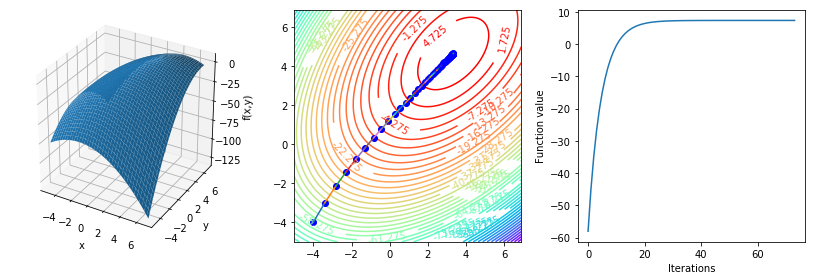

In [4]:
plot_optimization_trace(f,theta_history)

# Linear Regression -- Matrix Form

A general multiple-regression model can be written as

$$
y \given \xx = \beta_0 + \sum_j x_j \beta_j + \epsilon, \ \ \ \ \epsilon \sim \Gaussian{}{0, \sigma^2}
$$
Which is equivalent to

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots +  \beta_p x_{ip} + \epsilon_i \ \ \ \ for \ i=1,\ldots,N
$$

In matrix form, we can rewrite this model as 

$$
\left[\begin{array}{c} { y_1 \\ y_2 \\ \vdots \\ y_N}\end{array}\right]_{\ N \times 1} = \left[\begin{array}{ccccc} 1  & x_{11} & x_{12} & \ldots & x_{1p} \\ 1  & x_{21} & x_{22} & \ldots & x_{2p} \\ \vdots  & \vdots & \vdots & \ldots & \vdots \\ 1  & x_{N1} & x_{N2} & \ldots & x_{Np} \end{array}\right]_{\ N \times p+1} \left[\begin{array}{c} \ { \beta_0 \\ \beta_1 \\ \vdots \\ \beta_P}\end{array}\right]_{\ p+1 \times 1} \ + \left[\begin{array}{c} \ { \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_N}\end{array}\right]_{\ N \times 1}
$$

This can be rewritten more simply as:
$$
\yy = \mathbf{X} \mathbf{\beta} + \mathbf{\epsilon}
$$

# Linear Regression -- Closed Form Solution for $\beta$

Remember that maximizing log-likelihood is equivalent to minimizing **RSS** or **MSE**

$$
RSS = \sum_{i=1}^N \left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2 = \sum_{i=1}^N \left(e_i\right)^2 = \mathbf{e_i}^{T} \mathbf{e_i} = \left[\begin{array}{cccc} e_1 & e_2 & \dots & e_N \end{array}\right]_{1 \times N} \ \left[\begin{array}{c} { e_1 \\ e_2 \\ \vdots \\ e_N}\end{array}\right]_{\ N \times 1} 
$$

$$
\begin{aligned}
RSS &= (\yy - \mathbf{X} \mathbf{\beta})^{T} (\yy- \mathbf{X} \mathbf{\beta}) \\ &= (\yy^{T}  - \mathbf{\beta}^{T} \mathbf{X}^{T}) (\yy - \mathbf{X} \mathbf{\beta})  \\ &= \yy^{T} \yy  -  \beta^{T} \mathbf{X}^{T} \yy - \yy^{T} \mathbf{X} \mathbf{\beta} + \beta^{T} \mathbf{X}^{T} \mathbf{X} \beta \\ &= \yy \yy^{T} -  2 \beta^{T} \mathbf{X}^{T} \yy + \beta^{T} \mathbf{X}^{T} \mathbf{X} \beta 
\end{aligned}
$$

Where this development uses the fact that the transpose of a scalar is the scalar i.e. $\beta^{T} \mathbf{X}^{T} \yy = \yy^{T} \mathbf{X} \mathbf{\beta}$



To find the $\mathbf{\beta}$ that minimizes $RSS$, we solve the following equation:

$$
\nabla_\beta \ RSS = -2 \mathbf{X}^{T} \yy + 2 \mathbf{X}^{T} \mathbf{X} \beta = 0
$$

The corresponding solution to this linear system of equations is called the **ordinary least squares** or **OLS** solution

$$
\hat{\beta} = \beta^{\textrm{OLS}} = \beta^{\textrm{MLE}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\yy
$$

# Linear Regression -- Closed Form Solution for $\sigma^2$

Recall log-likelihoood function

$$
\loglik(\beta_0,\beta|\yy,\xx) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2\right]
$$

Which can be written in matrix form

$$
\loglik(\beta\given\yy,\xx) = -\frac{N}{2}\log 2\pi\sigma^2 - \frac{1}{2\sigma^2}(\yy -  \mathbf{X} \beta)^T(\yy -  \mathbf{X} \beta) 
$$

Taking derivative and equating it to zero yields

$$
(\sigma^{2})^\MLE = \frac{1}{N} (\yy -  \mathbf{X} \beta^\MLE)^T(\yy -  \mathbf{X} \beta^\MLE)  = \frac{1}{N} \sum_{i=1}^N \left(y_i - (\beta_0^\MLE + \sum_j x_{i,j} \beta_j^\MLE)\right)^2
$$

**<font color='red'> Please verify $(\sigma^{2})^\MLE$ at home </font>**

# Solving Linear Regression 
Summary:

We have two algorithms to find $\beta^{\MLE} = {\left[\beta_0^{\MLE}\  \beta_1^{\MLE}\  \beta_2^{\MLE}\  \ldots\  \beta_p^{\MLE}\  \right]}^{T}$:

1. Gradient ascent
2. Closed form solution in matrix form

Once we compute $\beta^{\MLE}$, we can get $(\sigma^2)^\MLE$ in closed form

In [5]:
X = numpy.asarray([[3.0,3.0,4.0,0.0],[3.0,3.0,3.0,0.0],[3.0,2.0,2.0,5.0],
[2.0,2.0,4.0,0.0],[3.0,3.0,4.0,4.0],[4.0,4.0,3.0,0.0],
[2.0,2.0,4.0,0.0],[2.0,2.0,2.0,0.0],[3.0,4.0,2.0,5.0],
[2.0,2.0,3.0,0.0],[2.0,4.0,2.0,0.0],[3.0,3.0,3.0,0.0],
[2.0,2.0,4.0,5.0],[4.0,3.0,2.0,6.0],[3.0,4.0,4.0,4.0],
[3.0,2.0,2.0,6.0],[3.0,3.0,3.0,0.0],[3.0,2.0,4.0,0.0],
[3.0,3.0,4.0,4.0],[3.0,4.0,2.0,0.0]])

Y = numpy.asarray([4.0,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,
3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0])

In [6]:
def solve_linear_regression(X,Y):
    N = len(Y)
    X1 = numpy.hstack((numpy.ones((N,1)),X))
    betas = numpy.dot(numpy.linalg.inv(numpy.dot(X1.transpose(),X1)),numpy.dot(X1.transpose(),Y))  
    return betas

betas_mle_exact = solve_linear_regression(X,Y)

init_beta = [0.1]*5
init_step = 0.1
iterations = 100
f = lambda betas: linear_regression_log_likelihood(Y,X,betas)
_,betas_mle_gradient_ascent,_,_ = gradient_ascent(f,init_beta,init_step,iterations)

names = ['0','COMP410','MATH233','STOR435','Beers']
for i in range(1,len(names)):
    print('Beta via gradient ascent',names[i],'=',betas_mle_gradient_ascent[i])
    print('Beta via normal forms   ',names[i],'=',betas_mle_exact[i])    

Beta via gradient ascent COMP410 = 0.27806666822748577
Beta via normal forms    COMP410 = 0.22205474290020533
Beta via gradient ascent MATH233 = 0.3610727018847913
Beta via normal forms    MATH233 = 0.34284882326743826
Beta via gradient ascent STOR435 = 0.34729779573130226
Beta via normal forms    STOR435 = 0.3088623205782586
Beta via gradient ascent Beers = -0.1312006212059956
Beta via normal forms    Beers = -0.13083827207015886


# Model Fit: Overfitting vs. Underfitting

Consider this simple function

$$
y = f(x) = \cos(1.5\pi x)
$$

Let us try to use linear regression to fit diffrent models that have polynomial features of different degrees

$$
y = f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_p x^p
$$

Where $p$ is the degree of the polynomial, which reflects the complexity of our model


Automatically created module for IPython interactive environment


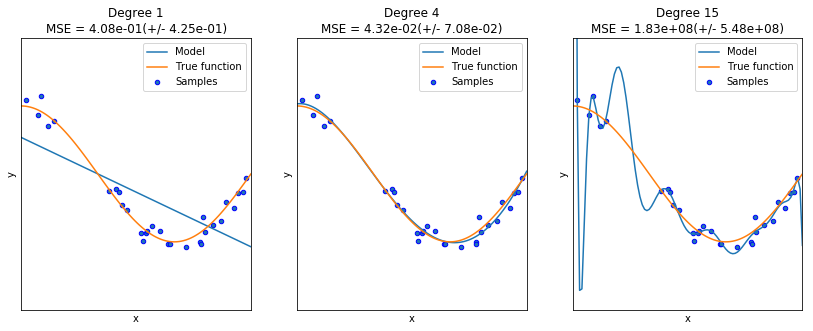

In [7]:
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
fig = plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
#plt.show()

def show_figure(fig):
    # create a dummy figure and use its
    # manager to display "fig"
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)


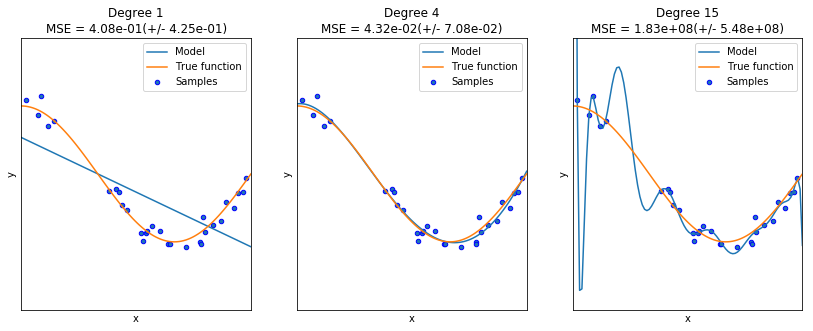

In [8]:
show_figure(fig)
plt.show()

* **Overfitting**: Model every minor variation in the input using highly flexible complex models 
    * High variance and low bias

* **Underfitting**: Simple model that is unable to capture the true relationships in given data
    * Low variance and high bias

* **Model Selection**: Picking the right model from a variety of models of different complexity

**<font color='red'> Q: Which model overfits/underfits the data? </font>**

# Bias-Variance Tradeoff

The **mean quared errors** or **MSE** may be decomposed into **bias** and **variance** components:

$$
\underbrace{\mathop{\mathbb{E}}(y - \hat{y})^2}_{\mathbf{MSE}} = \underbrace{(\mathop{\mathbb{E}}(\hat{y}) - y)^2}_{\mathbf{Bias^2}} + \underbrace{\mathop{\mathbb{E}} \left[ (\hat{y} - \mathop{\mathbb{E}}(\hat{y}))^2 \right]}_{\mathbf{Variance}} + \underbrace{\sigma^2_{e}}_{\mathbf{Irreducible \ Error}}
$$

<img src="./Images/biasvariance.png" width="800" align="center"/>

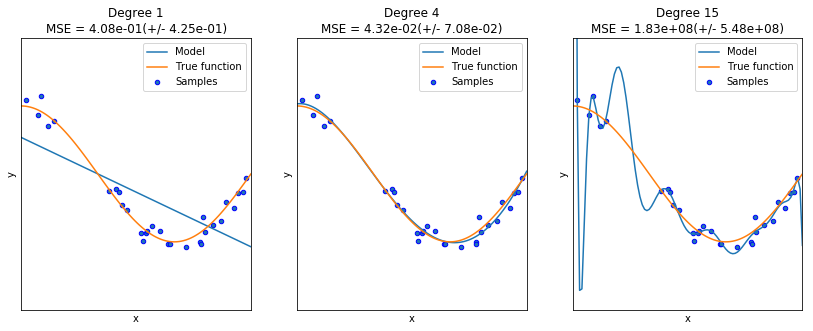

In case of the 15 Degree polynomial, the corresponding coefficients are:
[-2.98294669e+03  1.03899932e+05 -1.87417069e+06  2.03717225e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08]


In [9]:
show_figure(fig)
plt.show()
print ("In case of the 15 Degree polynomial, the corresponding coefficients are:")
print(pipeline.named_steps['linear_regression'].coef_)

**<font color='red'> Q: What do you notice about these coefficients ? </font>**

**<font color='red'> Q: What would you do to fix the overfitting (ill-posedness) problem? </font>**

# Ill-Posed Problems

**<font color='red'> Q: What happens if you are solving a linear system $Ax = y$ and there are more unknowns than equations? </font>**

In our setting -- $N$ samples, $P$ features --  linear regresion is ill-posed if $P>N$

Another example of ill-posed linear regression problem arises when we have two copies of the same predictors 

This is a problem even if $P<N$

# Ill-Posed Regression Problem -- Toy Example

We will look at an ill-posed regression problem, where we have two copies of the same predictor

For example, let's try to predict number of blocked shots per basketball game $y$

The predictors we use are: height in inches and height in centimeters (2.54cm = 1 inch)

$$
\newcommand{\hin}{\textrm{(height in inches)}}
\newcommand{\hcm}{\textrm{(height in centimeters)}}
\newcommand{\blocked}{\textrm{blocked shots per game}}
\blocked = \beta_0 + \beta_1 \hin \\ + \beta_2 \hcm + \epsilon
$$

but 

If $x_1 = x_2$ and $\beta^{\MLE} = [1,  0.0]$ then also :

$$
\begin{array}{llrccl}
1.&\beta^{\MLE} = &[&0, &2.54&]\\
2.&\beta^{\MLE} = &[&0.5, &1.27&]\\
3.& \beta^{\MLE} = &[&c,  &2.54(1-c)&] \\
\end{array}
$$

# Ill-Posed Regression Problem 

A more complicated version of this problem occurs when features are linearly dependent. For example:

$$
x_k = x_1 - 0.5x_2
$$

Because we will have many different solutions for $\beta_k, \beta_1, \beta_2$

**<font color='red'> Q:Why is this a problem? What will you conclude if the maximizing solution has $\beta_k=0$? </font>**

# Regularization 

One way of dealing with ill-posed problems (overfitting) is to change the objective -- like our log-likelihood -- so that it becomes well-posed

A common approach is Tikhonov regularization. If maximizing

$$
f(\theta)
$$ 

is ill-posed then maximize 

$$
f(\theta) - \lambda\sum_i \theta_i^2.
$$

**<font color='red'> Q: What happens when $\lambda$ is really large? </font>**
    
**<font color='red'> Imagine a simple example $f(\theta) = (\theta - 1.0)^2$, if $\lambda$ is $10^{200}$ can you guess the optimal solution of $(\theta - 1.0)^2 - \lambda\theta^2$?  </font>**

# Ridge Regression

Adding that penalty to linear regression log-likelihood yields **ridge regresion**

$$
\loglik(\beta_0,\beta|\yy,\xx) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2\right] - \underbrace{\frac{\lambda}{2} \sum_{j} \beta_{j}^2}_{\textrm{ridge penalty}}
$$

All those sums can get cumbersome, so we will use norms
1. $\ell_2$ norm $\norm{\xx} = \sqrt{\sum_{i} x_i^2}$
2. $\ell_1$ norm $\norm{\xx}_1 = \sum_{i} \left|x_i\right|$

$$
\loglik(\beta\given\yy,\xx) =  -\frac{1}{2\sigma^2}\norm{\yy - \mathbf{X} \mathbf{\beta}}^2  \underbrace{-\frac{\lambda}{2}\norm{\beta}^2}_{\textrm{ridge penalty}}+ \textrm{const.}
$$


# What Does Ridge Penalty Accomplish?

Let's take a look at the objective of linear regression problem with two copies of the same predictor

In [10]:
import matplotlib.pyplot as plt 
def plot_contours(fun,Y,X,beta_range):
    nb = len(beta_range)
    fs = numpy.zeros((nb,nb))
    Beta1,Beta2 = numpy.meshgrid(beta_range,beta_range)
    for (i,beta1) in enumerate(beta_range):    
        for (j,beta2) in enumerate(beta_range):        
            betas = numpy.asarray([[beta1],[beta2]])     #make column vector 
            loglik,_ = fun(Y,X,betas)                    #don
            fs[i,j] = loglik
    levels=numpy.arange(numpy.min(fs),numpy.max(fs),10)
    C = plt.contour(Beta1,Beta2,fs,levels=levels)
    plt.clabel(C, inline=1, fontsize=10)
    plt.xlabel('beta1')
    plt.ylabel('beta2')
def linear_regression_log_likelihood(Y,X,beta):    
    Yhat = numpy.dot(X,beta) 
    res = Y - Yhat    
    loglik = -0.5*numpy.dot(res.transpose(),res)
    grad = numpy.dot(res.transpose(),X)
    return loglik,grad

Text(0.5,1,'Log-likelihood for ill-posed linear regression\n (features x1 and x2 the same)')

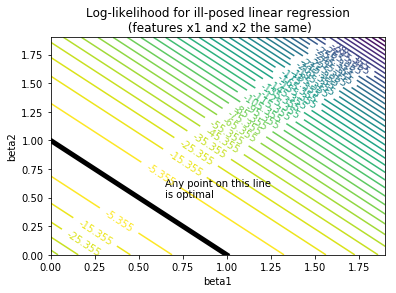

In [11]:
N = 100;
x1 = numpy.random.randn(N,1)
x2 = x1 # two copies of the same predictor
Y = 0.5*x1 + 0.5*x2 + 0.1*numpy.random.randn(N,1)
X = numpy.hstack((x1,x2))
beta_range = numpy.arange(0.0,2.0,0.1)
plt.figure()
plot_contours(linear_regression_log_likelihood,Y,X,beta_range)
plt.plot([0.0,1.0],[1.0,0],'k',linewidth=5.0) 
plt.annotate('Any point on this line\nis optimal',(0.65,0.5))
plt.title('Log-likelihood for ill-posed linear regression\n (features x1 and x2 the same)')

In [12]:
def ridge_regression_log_likelihood(Y,X,beta,lam=10.0):    
    Yhat = numpy.dot(X,beta) 
    res = Y - Yhat    
    loglik = -0.5*numpy.dot(res.transpose(),res) 
    loglik = loglik - lam/2.0*numpy.dot(beta.transpose(),beta)    
    grad = numpy.dot(X.transpose(),res) + lam*beta
    return loglik,grad

('Line Search failed. Iteration: ', 44)


Text(0.5,1,'Log-likelihood for ridge penalized regression')

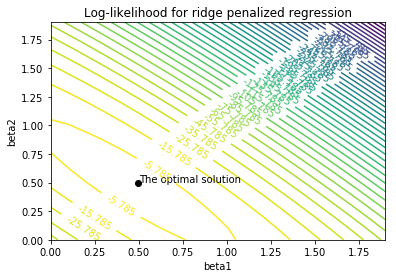

In [13]:
N = 100;
x1 = numpy.random.randn(N,1)
x2 = x1  #two copies of the same predictor
Y = 0.5*x1 + 0.5*x2 + 0.001*numpy.random.randn(N,1)
X = numpy.hstack((x1,x2))
beta_range = numpy.arange(0.0,2.0,0.1)
plot_contours(ridge_regression_log_likelihood,Y,X,beta_range)
# optimize ridge regression 
f = lambda beta: ridge_regression_log_likelihood(Y,X,beta) 
init_beta = numpy.asarray([[0.0],[0.0]])
_,beta_mle,_,_ = gradient_ascent(f,init_beta,0.1,100)
plt.plot(beta_mle[0],beta_mle[1],'ko',linewidth=5.0) 
plt.annotate('The optimal solution',(0.5,0.5))
plt.title('Log-likelihood for ridge penalized regression')

# Ridge Regression -- Computing Gradients

$$
\loglik(\beta\given\yy,\xx) =  -\frac{1}{2\sigma^2}\norm{\yy - \mathbf{X} \mathbf{\beta}}^2  \underbrace{-\frac{\lambda}{2}\norm{\beta}^2}_{\textrm{ridge penalty}}+ \textrm{const.}
$$

Computing the gradient and setting it to zero

$$
\nabla_\beta \loglik(\beta\given\yy,\xx) = \frac{1}{\sigma^2}X^T(\yy - \mathbf{X} \mathbf{\beta}) - \lambda\beta = 0
$$

yields

$$
\beta^{\MLE} = (\mathbf{X}^T\mathbf{X} + \lambda\sigma^2 \mathbf{I}_N)^{-1}(\mathbf{X}^T\yy)
$$

Where $\mathbf{I}_N$ is the identity matrix of size $N$

Contrast this to closed form solution of linear regression

$$
\beta^{\textrm{MLE}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\yy
$$

# Ridge Regression -- Computing Gradients

The bias/intercept coefficient $\beta_0$ is typically not regularized in a linear regression

A regularized $\beta_0$ (shrinked) may us from prevent finding the correct relationship

$$
\nabla \loglik(\beta_0,\beta,\sigma^2\given\xx,\yy) = \left[\begin{array}{c} 
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)(-1) \\
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_1 + \sum_j x_{i,j} \beta_j)\right)(-x_{i,1}) - \lambda \beta_1 \\
\vdots\\
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)(-x_{i,p}) - \lambda \beta_p
\end{array}
\right]
$$

Note that  $\beta_0$ is **not** regularized


Remember our closed form solution for ridge regression

$$
\beta^{\MLE} = (\mathbf{X}^T\mathbf{X} + \lambda\sigma^2 \mathbf{I}_N)^{-1}(\mathbf{X}^T\yy)
$$

Updating our closed form solution without regularizing $\beta_0$ will yeild

$$
\beta^{\MLE} = \left(\mathbf{X}^T\mathbf{X} + \lambda\sigma^2 \left[\begin{array}{ccccc} 0  & 0 & 0 & \ldots & 0 \\ 0  & 1 & 0 & \ldots & 0 \\ \vdots  & \vdots & \vdots & \ldots & \vdots \\ 0  & 0 & 0 & \ldots & 1 \end{array}\right]_{\ N \times N}\right)^{-1}(\mathbf{X}^T\yy)
$$

* Let us re-run the previous function approximation example adding ridge penality ($\lambda = 1$)

Automatically created module for IPython interactive environment


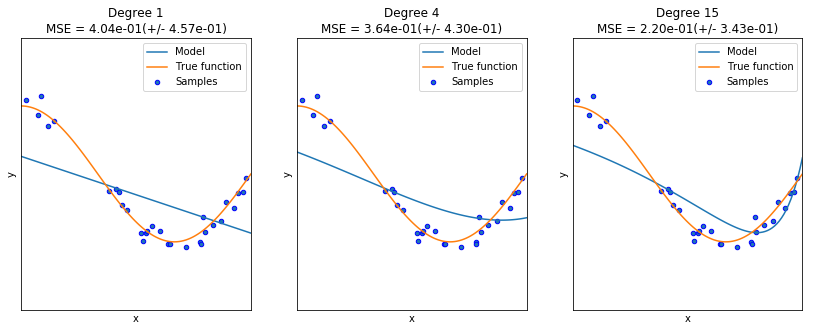

In [14]:
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
fig = plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    Ridge_regression = Ridge(alpha=1.0)
    pipeline = Pipeline([("polynomial_features", polynomial_features),("ridge_regression", Ridge_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
#plt.show()

def show_figure(fig):
    # create a dummy figure and use its
    # manager to display "fig"
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)


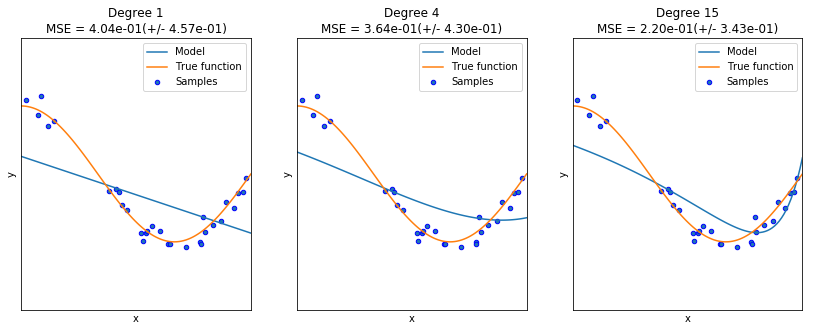

In case of the 15 Degree polynomial (ridge penality with lambda = 1), the corresponding coefficients are:
[-1.26235718 -0.6622358  -0.23827481 -0.00132961  0.12347929  0.18501922
  0.21120668  0.21777852  0.21365414  0.20392415  0.19150553  0.17806689
  0.16455248  0.15148276  0.13912904]


In [15]:
show_figure(fig)
plt.show()
print ("In case of the 15 Degree polynomial (ridge penality with lambda = 1), the corresponding coefficients are:")
print(pipeline.named_steps['ridge_regression'].coef_)

* Let us adjust $\lambda$ to a smaller value (e.g., 0.1 instead of 1)

Automatically created module for IPython interactive environment


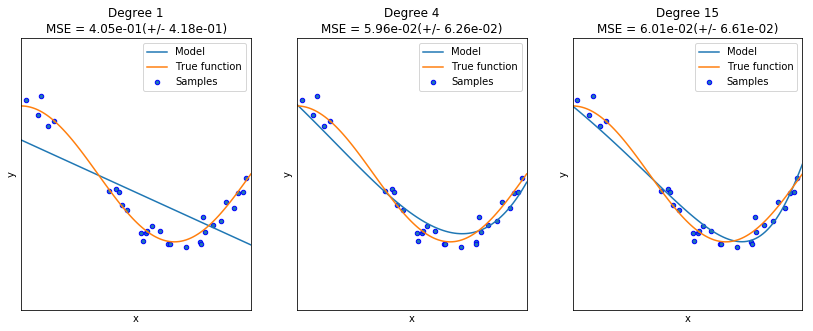

In [16]:
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
fig = plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    Ridge_regression = Ridge(alpha=0.1)
    pipeline = Pipeline([("polynomial_features", polynomial_features),("ridge_regression", Ridge_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
#plt.show()

def show_figure(fig):
    # create a dummy figure and use its
    # manager to display "fig"
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)


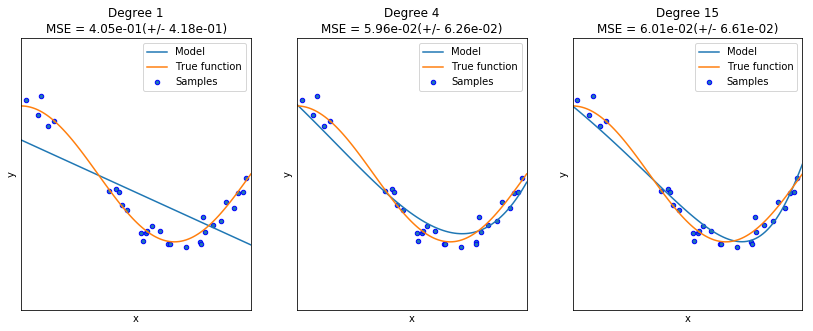

In case of the 15 Degree polynomial (ridge penality with lambda = 0.1), the corresponding coefficients are:
[-2.80087868 -0.98288922  0.11351008  0.58282837  0.71107732  0.67244816
  0.56054335  0.42377008  0.28623667  0.15916003  0.04700995 -0.0491903
 -0.13009685 -0.19710665 -0.2518675 ]


In [17]:
show_figure(fig)
plt.show()
print ("In case of the 15 Degree polynomial (ridge penality with lambda = 0.1), the corresponding coefficients are:")
print(pipeline.named_steps['ridge_regression'].coef_)

* In ML, a parameter whose value is set before the learning process begins (such as $\lambda$) is called a **hyperparameter**

* Methods used to tune hyperparameters include:
 * Manual Search
 * Grid Search
 * Random Search
 * Cross-validation error 
 * ...
 
**More on this topic later in this course**

# Today 

1. Reviewed linear regression and gradient ascent 
2. Linear regression in matrix form
3. Introduced the concept of regularization 
4. Introduced ridge regression as an approach to dealing with correlated predictors